In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl

import sys

home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

sys.path.append(git_path)
from use.segment.pick import random_ecg
from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input

from sklearn.preprocessing import MinMaxScaler

In [2]:
#data
'''
02-06 
no faced beat
train : each seg 5000 / q beat 15 -> 415 /f beat 802
epoch : 21  (earlystopping :5에포크 동안 변화 없을 시)
'''
#preprocessing: min - max scaler
#epoch
#validation

#plus 데이터 더 많이


'\n02-06 \nno faced beat\ntrain : each seg 5000 / q beat 15 -> 415 /f beat 802\nepoch : 100 \n'

In [3]:
#1. file open to dataframe

In [4]:
input_folder = abspath(home_path+"\\save\\4beat_remove\\type2")
output_folder = abspath(home_path+"\\pick\\model02\\06")
vali_folder = abspath(home_path+"\\pick\\model02\\04\\validation")
test_folder = abspath(home_path+"\\pick\\model02\\06\\test\\01")

In [5]:
random_ecg(5000,input_folder,output_folder)



random_ecg


In [6]:
random_ecg(200,input_folder,vali_folder)
random_ecg(1000,input_folder,test_folder)

random_ecg
random_ecg


In [7]:
def to_mixmax_tensor(path):
    data = pd.DataFrame(ecgtodf(path))
    data=data.sample(frac=1)

    record = data.iloc[:,:288]
    ann = data.iloc[:,288]


    t_record = record.T
    scaler = MinMaxScaler()
    scaler.fit(t_record)
    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    ann = pd.DataFrame(ann)

    x=x_tensor_input(record)
    y=y_tensor_input(ann)

    return x,y

In [8]:
train_x,train_y = to_mixmax_tensor(output_folder+"\\1_all")
validation_x,validation_y = to_mixmax_tensor(vali_folder+"\\1_all")
test_x,test_y = to_mixmax_tensor(test_folder+"\\1_all")

100_1059.csv
100_1078.csv
100_1085.csv
100_1097.csv
100_1103.csv
100_1112.csv
100_1120.csv
100_1125.csv
100_1138.csv
100_1148.csv
100_1150.csv
100_1178.csv
100_1188.csv
100_1192.csv
100_1214.csv
100_1219.csv
100_1235.csv
100_1273.csv
100_1280.csv
100_1285.csv
100_1288.csv
100_1298.csv
100_1310.csv
100_1311.csv
100_1312.csv
100_1324.csv
100_1345.csv
100_1386.csv
100_1394.csv
100_1443.csv
100_1460.csv
100_1461.csv
100_1479.csv
100_1482.csv
100_1490.csv
100_1493.csv
100_1509.csv
100_1510.csv
100_1520.csv
100_1528.csv
100_1550.csv
100_1557.csv
100_1566.csv
100_1567.csv
100_1568.csv
100_1582.csv
100_1586.csv
100_1587.csv
100_1591.csv
100_160.csv
100_1603.csv
100_1608.csv
100_161.csv
100_1618.csv
100_1643.csv
100_1664.csv
100_1680.csv
100_1693.csv
100_1711.csv
100_1733.csv
100_1735.csv
100_1741.csv
100_1751.csv
100_1754.csv
100_1763.csv
100_1777.csv
100_179.csv
100_1818.csv
100_1821.csv
100_1829.csv
100_1839.csv
100_1866.csv
100_1878.csv
100_1888.csv
100_1906.csv
100_1927.csv
100_1961.csv
10

In [21]:
model = kr.models.load_model("C:\\sebin\\ecg\\ecg_data_wfdb\\model\\save\\02.h5")

In [22]:
model.compile(loss='sparse_categorical_crossentropy' ,optimizer='adam',metrics=['accuracy'])

In [23]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,),tf.keras.callbacks.TensorBoard('./logs02',update_freq=10)]

In [24]:
history = model.fit(train_x,train_y,epochs=500,validation_data=(validation_x,validation_y),callbacks = callbacks)

Epoch 1/500
425/425 [==============================] - 2s 4ms/step - loss: 0.7548 - accuracy: 0.7204 - val_loss: 0.8119 - val_accuracy: 0.7349
Epoch 2/500
425/425 [==============================] - 2s 4ms/step - loss: 0.3980 - accuracy: 0.8715 - val_loss: 0.6984 - val_accuracy: 0.7759
Epoch 3/500
425/425 [==============================] - 2s 4ms/step - loss: 0.3483 - accuracy: 0.8888 - val_loss: 0.5498 - val_accuracy: 0.8458
Epoch 4/500
425/425 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.9014 - val_loss: 0.5934 - val_accuracy: 0.8361
Epoch 5/500
425/425 [==============================] - 2s 4ms/step - loss: 0.3020 - accuracy: 0.9082 - val_loss: 0.4724 - val_accuracy: 0.8578
Epoch 6/500
425/425 [==============================] - 2s 4ms/step - loss: 0.2884 - accuracy: 0.9113 - val_loss: 0.4904 - val_accuracy: 0.8506
Epoch 7/500
425/425 [==============================] - 2s 4ms/step - loss: 0.2722 - accuracy: 0.9150 - val_loss: 0.4145 - val_accuracy: 0.8723

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

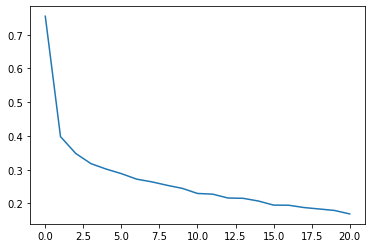

In [26]:
plt.plot(loss)

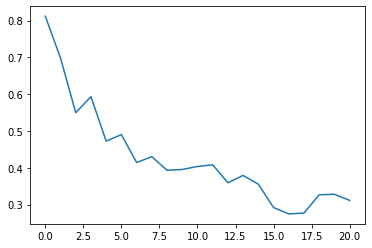

In [27]:
plt.plot(val_loss)

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

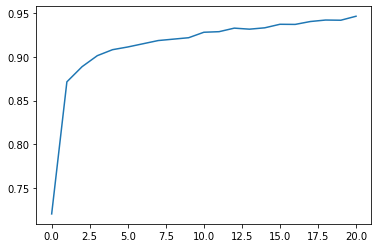

In [29]:
plt.plot(accuracy)

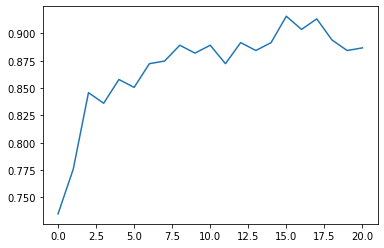

In [30]:
plt.plot(val_accuracy)

In [31]:
model.save(git_path+"\\test\\02\\06\\model02.h5")

In [32]:
results = model.evaluate(test_x,test_y)

120/120 [==============================] - 0s 1ms/step - loss: 0.2478 - accuracy: 0.9096
